In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

df_m = pd.read_excel('./microwave_reviews.xltx')

Setup Complete


In [3]:
frames=['marketplace','customer_id','review_id','product_parent']
df_m = df_m.drop(columns=frames)
index = df_m[(df_m['verified_purchase']=='N') | (df_m['verified_purchase']=='n')].index
df_m.drop(index, inplace=True)

In [5]:
df_m.shape

(1095, 13)

In [6]:
index1 = df_m[(df_m['total_votes']==0) | (df_m['helpful_votes'] / df_m['total_votes'] < 0.5)].index
df_m_done = df_m.drop(index1)

In [7]:
df_m_done.shape

(529, 13)

In [8]:
df_m_done.head(2)

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity
9,B007V7G5TU,danby 0.7 cu.ft. countertop microwave,Major Appliances,2,1,1,N,Y,It had great reviews when we ordered it,The finish is nice and matches our stainless s...,8/28/2015,0.235714,0.45119
12,B005GSZB9Q,"whirlpool wmc20005yw countertop microwave, 0....",Major Appliances,5,1,1,N,Y,Five Stars,Love this microwave! Gives me more space in m...,8/27/2015,0.562500,0.55000


In [21]:
import datetime
df_m_done['year'] = pd.DatetimeIndex(df_m_done['review_date']).year.astype(str)
df_m_done['month'] = pd.DatetimeIndex(df_m_done['review_date']).month.astype(str)
df_m_done['y_m'] = df_m_done['year'] + '-' + df_m_done['month']

In [11]:
df_m_done.head(2)

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity,year,month,y_m
9,B007V7G5TU,danby 0.7 cu.ft. countertop microwave,Major Appliances,2,1,1,N,Y,It had great reviews when we ordered it,The finish is nice and matches our stainless s...,8/28/2015,0.235714,0.45119,2015,8,2015-8
12,B005GSZB9Q,"whirlpool wmc20005yw countertop microwave, 0....",Major Appliances,5,1,1,N,Y,Five Stars,Love this microwave! Gives me more space in m...,8/27/2015,0.562500,0.55000,2015,8,2015-8


In [24]:
df_m_done.shape

(529, 17)

In [25]:
df_m_done.groupby('y_m').count()

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity,year,month,star_avg
y_m,,,,,,,,,,,,,,,,
2004-10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2004-11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2004-6,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
2005-1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2005-11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2007-11,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
2007-12,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2007-2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
2007-3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [26]:
df_m_done.y_m.unique()

array(['2015-8', '2015-11', '2015-9', '2015-5', '2015-2', '2015-1',
       '2015-7', '2015-6', '2015-4', '2015-3', '2015-10', '2015-12',
       '2014-12', '2014-9', '2014-8', '2014-6', '2014-5', '2014-4',
       '2014-2', '2014-11', '2014-7', '2014-10', '2014-1', '2014-3',
       '2013-12', '2013-5', '2013-11', '2013-1', '2013-10', '2013-4',
       '2013-2', '2013-9', '2013-8', '2013-6', '2013-7', '2013-3',
       '2012-12', '2012-10', '2012-7', '2012-11', '2012-9', '2012-5',
       '2012-8', '2012-1', '2012-6', '2012-4', '2012-2', '2011-12',
       '2011-11', '2011-7', '2011-10', '2011-9', '2011-8', '2011-2',
       '2011-6', '2011-4', '2011-3', '2011-1', '2010-1', '2010-11',
       '2010-8', '2010-12', '2010-7', '2010-10', '2010-3', '2010-2',
       '2009-12', '2009-11', '2009-4', '2008-10', '2008-9', '2008-5',
       '2008-2', '2007-12', '2007-11', '2007-8', '2007-7', '2007-3',
       '2007-2', '2007-4', '2005-11', '2005-1', '2004-10', '2004-11',
       '2004-6'], dtype=object)

In [13]:
# df_m_done['star_avg'] = df_m_done.groupby('y_m').star_rating.mean()

,product_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,polarity,subjectivity,year,month,y_m,star_avg
9,B007V7G5TU,danby 0.7 cu.ft. countertop microwave,Major Appliances,2,1,1,N,Y,It had great reviews when we ordered it,The finish is nice and matches our stainless s...,8/28/2015,0.235714,0.45119,2015,8,2015-8,NaN
12,B005GSZB9Q,"whirlpool wmc20005yw countertop microwave, 0....",Major Appliances,5,1,1,N,Y,Five Stars,Love this microwave! Gives me more space in m...,8/27/2015,0.562500,0.55000,2015,8,2015-8,NaN


In [27]:
df_m_res = pd.DataFrame()
df_m_res['date'] = df_m_done.y_m.unique().copy()
# df_m_res = df_m_done[['y_m']].unique().copy()

In [28]:
df_m_res.shape

(85, 1)

In [32]:
df_m_done.groupby('y_m').product_category.count().to_frame()

,product_category
y_m,
2004-10,1
2004-11,1
2004-6,2
2005-1,1
2005-11,1
2007-11,2
2007-12,1
2007-2,1
2007-3,1


In [48]:
df_m_res = df_m_done.groupby('y_m').agg(
    {'product_category': 'count',
    'star_rating': 'mean',
    'polarity': 'mean'}
)
df_m_res.head()

,product_category,star_rating,polarity
y_m,,,
2004-10,1,3.0,0.179090
2004-11,1,1.0,0.218472
2004-6,2,3.5,0.081212
2005-1,1,5.0,0.210784
2005-11,1,5.0,0.201265


In [49]:
df_m_res.rename(columns={'product_category': 'monthly_reviews', 'star_rating': 'monthly_avg_stars', 'polarity': 'monthly_avg_polarity'}, inplace=True)
df_m_res.head(2)

,monthly_reviews,monthly_avg_stars,monthly_avg_polarity
y_m,,,
2004-10,1,3.0,0.179090
2004-11,1,1.0,0.218472


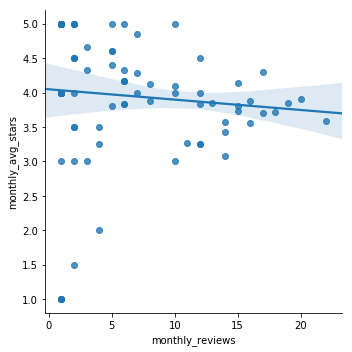

In [54]:
# import itertools
# mks = itertools.cycle(['o', 'x'])
# markers = [next(mks) for i in res["product_category"].unique()]

sns.lmplot(x="monthly_reviews", y="monthly_avg_stars", data=df_m_res,
            palette="Set1")

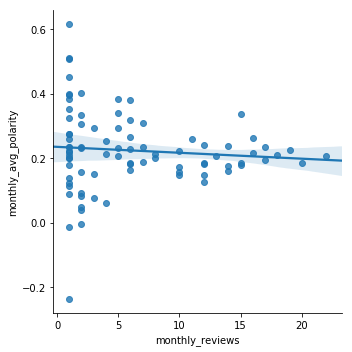

In [55]:
sns.lmplot(x="monthly_reviews", y="monthly_avg_polarity", data=df_m_res,
            palette="Set1")